
Data Description
                open          high           low         close        volume  \
count    366.000000    366.000000    366.000000    366.000000  3.660000e+02   
mean   11800.405954  12096.102384  11557.203360  11885.604614  3.318226e+10   
std     5718.301734   6020.171012   5542.453454   5892.780284  1.314119e+10   
min     5002.578125   5331.833984   4106.980957   4970.788086  1.225260e+10   
25%     9017.696289   9186.858642   8839.824707   9052.528565  2.326904e+10   
50%     9820.561035   9972.205078   9660.503906   9849.638672  3.210931e+10   
75%    11771.668701  11956.127685  11617.719726  11778.479004  4.037753e+10   
max    41259.246094  41946.738281  40306.925781  40797.609375  8.810752e+10   

           return  close_to_open  close_to_high  close_to_low    macd_line  \
count  366.000000     366.000000     366.000000    366.000000   366.000000   
mean     1.005159       1.005077       0.982562      1.025617   345.361300   
std      0.038234       0.038146   

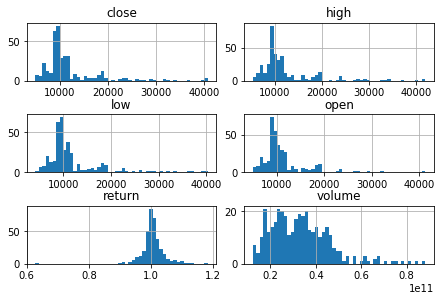

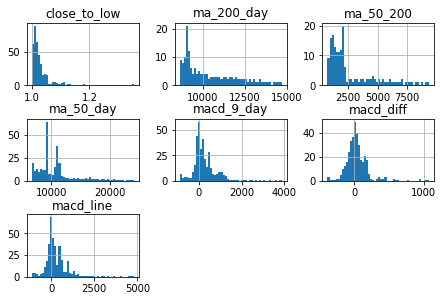

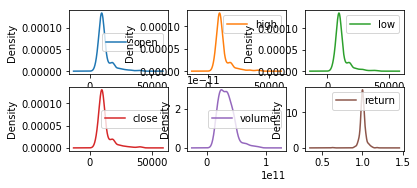

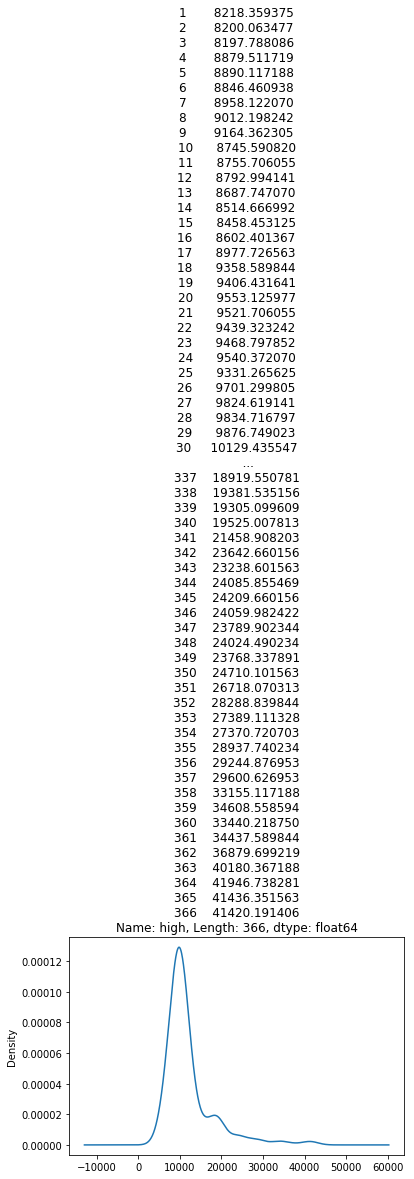

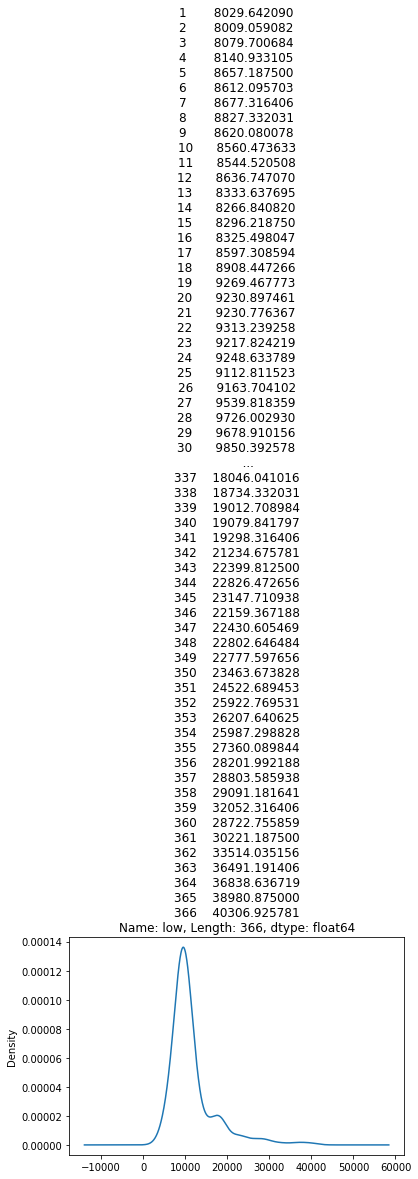

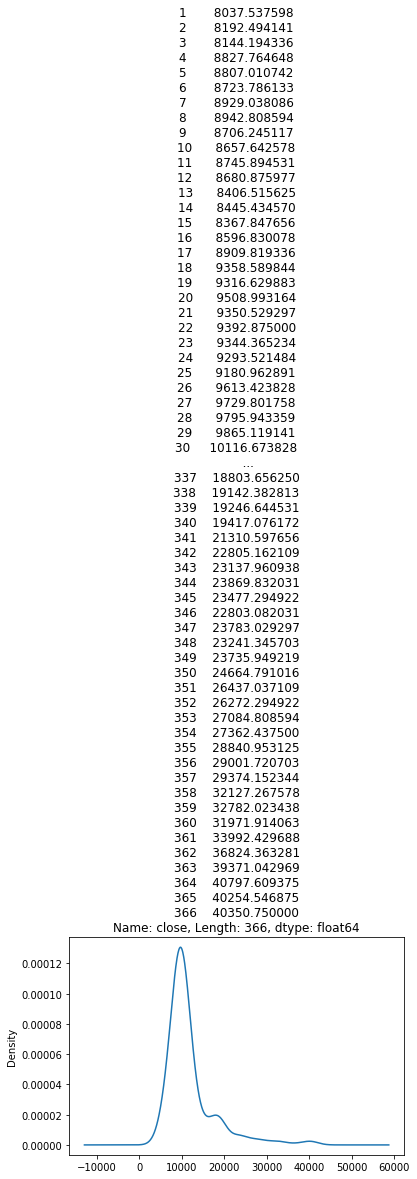

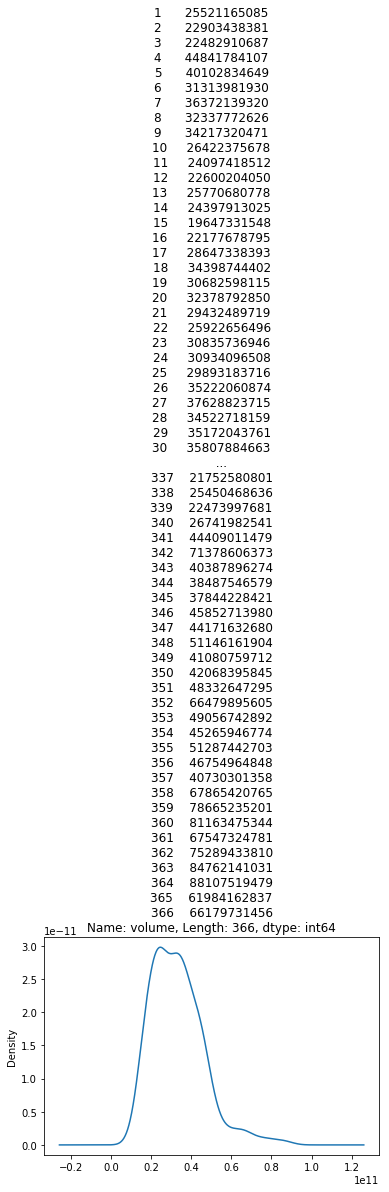

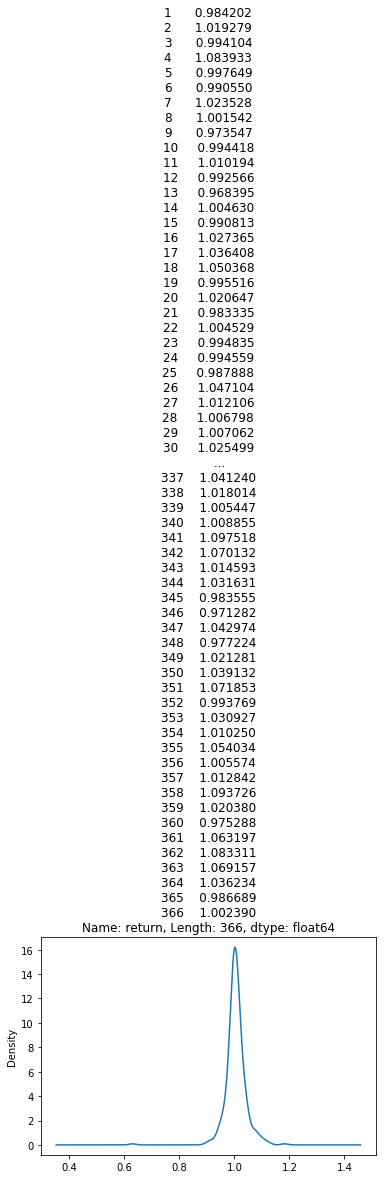

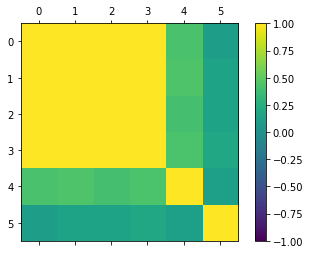

In [2]:
## Exploration of data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def separateCSV(filename):
    df = pd.read_csv(filename, header=0)
    filename = filename[:-4]
    df.drop(labels="Close", axis=1, inplace=True)
    df.columns = ["date", "open", "high", "low", "close", "volume"]
    df["date"] = pd.to_datetime(df["date"])

    #Added features
    df["return"] = df["close"] / df["close"].shift(1)
    df["close_to_open"] = df["close"] / df["open"]
    df["close_to_high"] = df["close"] / df["high"]
    df["close_to_low"] = df["close"] / df["low"]

    ema_12_day = df["close"].ewm(com=(12-1)/2).mean()
    ema_26_day = df["close"].ewm(com=(26-1)/2).mean()
    df["macd_line"] = ema_12_day - ema_26_day
    df["macd_9_day"] = df["macd_line"].ewm(com=(9-1)/2).mean()
    df["macd_diff"] = df["macd_line"] - df["macd_9_day"]
    df["ma_50_day"] = df["close"].rolling(50).mean()
    df["ma_200_day"] = df["close"].rolling(200).mean()
    df["ma_50_200"] = df["ma_50_day"] - df["ma_200_day"]

    df = df.iloc[1:]

    #df.columns = ["date", "open", "high", "low", "close", "volume", "return", "close_to_open", "close_to_high",
    #              "close_to_low", "macd_line", "macd_9_day", "macd_diff", "ma_50_day", "ma_200_day", "ma_50_200"]


    df.drop(["date"], axis=1, inplace=True)
    cols = list(df.columns)


    print("\nData Description\n",df.describe())
    print("Data Correlation\n", df.corr(method='pearson'))
    print("Standart Deviation\n", df.std())
    print("Variance\n", df.var())
    print("Skewness\n", df.skew())

    df1 = df.iloc[:, :6]
    df2 = df.iloc[:, 8:]
    df1.hist(bins=50)
    plt.tight_layout(pad=0.05)
    df2.hist(bins=50)
    plt.tight_layout(pad=0.05)

    #Skewness

    df1.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
    for i in df1.columns:
        df1[i].plot(kind='density')
        plt.title(df1[i])
        plt.show()

    print("\nData1 Description\n",df1.describe())

    #Correlation
    corr_fig = plt.figure()
    axises = corr_fig.add_subplot(111)
    axcorr = axises.matshow(df1.corr(), vmin=-1, vmax=1)
    corr_fig.colorbar(axcorr)
    cols = np.arange(0,6,1)
    axises.set_xticks(cols)
    axises.set_yticks(cols)
    plt.show()

separateCSV("BTC-USD.csv")


In [3]:
from sklearn import tree

X = pd.read_csv("TSLA_X_learn.csv", header=0)
y = pd.read_csv("TSLA_y_learn.csv", header=0)
X_test = pd.read_csv("TSLA_X_test.csv", header=0)


X = X.values
y = y.values

model = tree.DecisionTreeRegressor()
model.fit(X, y)

y_pred = model.predict(X_test)

y_test = pd.read_csv("TSLA_y_test.csv", header=0)
y_test = y_test.values

plt.plot(y_pred)
plt.plot(y_test)

#Performance Evaluation
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R2 Score: ', r2)


FileNotFoundError: File b'TSLA_X_learn.csv' does not exist